In [1]:
import spacy
import wordcloud
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
from google.colab import files
files.upload()

Saving extract_reviews.csv to extract_reviews.csv


{'extract_reviews.csv': b'stars,comment\r\n5.0 out of 5 stars,"\n\n\n\n\n\n\n\n  \n  \n    Delivered on time and the product was as per specs. No cheating.\n  \n"\r\n5.0 out of 5 stars,"\n\n\n\n\n\n\n\n  \n  \n    Delivered on time and the product was as per specs. No cheating.\n  \n"\r\n4.0 out of 5 stars,"\n\n\n\n\n\n\n\n  \n  \n    Let me sum up my mind here. I hate Iphones. I used to have an work phone (Iphone SE).Being a Sony Xperia user since Sony Arc times, I didn\'t have a choice to move away form the Sony portfolio as they don\'t sell in India anymore. My XZ1 is still working after 5.5 years, but she is getting old. And I repeat I hate IPhones.After much deliberation between 12, 13 and 13 Mini, I went with 13 Mini.1. I really wanted a phone I could use in a single hand, it fits perfect.2. I got a great deal on the purchase, as the net amt I paid was Rs. 58,900 after card discounts. So it is cheaper than a lot of Android phones with high end configuration.3. Performance. It is 

In [33]:
df = pd.read_csv('extract_reviews.csv')
df.head()

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Delivered on time ...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Delivered on time ...
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Let me sum up my m...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Pros:Form factor i...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice and small pho...


In [34]:
df.shape

(1200, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   stars    1200 non-null   object
 1   comment  1200 non-null   object
dtypes: object(2)
memory usage: 18.9+ KB


In [ ]:
df.isnull().any()

stars      False
comment    False
dtype: bool

In [6]:
from google.colab import files
files.upload()

Saving Afinn.csv to Afinn.csv


{'Afinn.csv': b"word,value\r\nabandon,-2\r\nabandoned,-2\r\nabandons,-2\r\nabducted,-2\r\nabduction,-2\r\nabductions,-2\r\nabhor,-3\r\nabhorred,-3\r\nabhorrent,-3\r\nabhors,-3\r\nabilities,2\r\nability,2\r\naboard,1\r\nabsentee,-1\r\nabsentees,-1\r\nabsolve,2\r\nabsolved,2\r\nabsolves,2\r\nabsolving,2\r\nabsorbed,1\r\nabuse,-3\r\nabused,-3\r\nabuses,-3\r\nabusive,-3\r\naccept,1\r\naccepted,1\r\naccepting,1\r\naccepts,1\r\naccident,-2\r\naccidental,-2\r\naccidentally,-2\r\naccidents,-2\r\naccomplish,2\r\naccomplished,2\r\naccomplishes,2\r\naccusation,-2\r\naccusations,-2\r\naccuse,-2\r\naccused,-2\r\naccuses,-2\r\naccusing,-2\r\nache,-2\r\nachievable,1\r\naching,-2\r\nacquit,2\r\nacquits,2\r\nacquitted,2\r\nacquitting,2\r\nacrimonious,-3\r\nactive,1\r\nadequate,1\r\nadmire,3\r\nadmired,3\r\nadmires,3\r\nadmiring,3\r\nadmit,-1\r\nadmits,-1\r\nadmitted,-1\r\nadmonish,-2\r\nadmonished,-2\r\nadopt,1\r\nadopts,1\r\nadorable,3\r\nadore,3\r\nadored,3\r\nadores,3\r\nadvanced,1\r\nadvantage,2\r\

In [35]:
afinn = pd.read_csv('Afinn.csv',encoding = 'latin1')
afinn.head()
afinn.shape

(2477, 2)

In [8]:
from google.colab import files
files.upload()

Saving stopwords_english.csv to stopwords_english.csv


{'stopwords_english.csv': b"stopwords\r\nll\r\ntis\r\ntwas\r\nve\r\na\r\na's\r\nable\r\nableabout\r\nabout\r\nabove\r\nabroad\r\nabst\r\naccordance\r\naccording\r\naccordingly\r\nacross\r\nact\r\nactually\r\nad\r\nadded\r\nadj\r\nadopted\r\nae\r\naf\r\naffected\r\naffecting\r\naffects\r\nafter\r\nafterwards\r\nag\r\nagain\r\nagainst\r\nago\r\nah\r\nahead\r\nai\r\nain't\r\naint\r\nal\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalongside\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namid\r\namidst\r\namong\r\namongst\r\namoungst\r\namount\r\nan\r\nand\r\nannounce\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanymore\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\nao\r\napart\r\napparently\r\nappear\r\nappreciate\r\nappropriate\r\napproximately\r\naq\r\nar\r\nare\r\narea\r\nareas\r\naren\r\naren't\r\narent\r\narise\r\naround\r\narpa\r\nas\r\naside\r\nask\r\nasked\r\nasking\r\nasks\r\nassociated\r\nat\r\nau\r\nauth\r\navailable\r\naw\r\naway\r\nawfully\r\naz\r\nb\r\n

In [36]:
imported_stopwords = pd.read_csv('stopwords_english.csv')
imported_stopwords.shape

(1296, 1)

In [37]:
df['comment'] = [comment.strip() for comment in df.comment]

In [38]:
df['comment'] = [comment for comment in df.comment if comment]

In [39]:
df.head()

,stars,comment
0,5.0 out of 5 stars,Delivered on time and the product was as per s...
1,5.0 out of 5 stars,Delivered on time and the product was as per s...
2,4.0 out of 5 stars,Let me sum up my mind here. I hate Iphones. I ...
3,5.0 out of 5 stars,Pros:Form factor is unmatched. There is litera...
4,5.0 out of 5 stars,Nice and small phone. Good for showing off.


In [40]:
df['comment'] = [comment.lower() for comment in df.comment]
df.head()

,stars,comment
0,5.0 out of 5 stars,delivered on time and the product was as per s...
1,5.0 out of 5 stars,delivered on time and the product was as per s...
2,4.0 out of 5 stars,let me sum up my mind here. i hate iphones. i ...
3,5.0 out of 5 stars,pros:form factor is unmatched. there is litera...
4,5.0 out of 5 stars,nice and small phone. good for showing off.


In [41]:
df['comment'] = [comment.translate(str.maketrans('','',string.punctuation)) for comment in df.comment]

In [42]:
df.head()

,stars,comment
0,5.0 out of 5 stars,delivered on time and the product was as per s...
1,5.0 out of 5 stars,delivered on time and the product was as per s...
2,4.0 out of 5 stars,let me sum up my mind here i hate iphones i us...
3,5.0 out of 5 stars,prosform factor is unmatched there is literall...
4,5.0 out of 5 stars,nice and small phone good for showing off


In [43]:
join_comment = ' '.join(df.comment)
join_comment

'delivered on time and the product was as per specs no cheating delivered on time and the product was as per specs no cheating let me sum up my mind here i hate iphones i used to have an work phone iphone sebeing a sony xperia user since sony arc times i didnt have a choice to move away form the sony portfolio as they dont sell in india anymore my xz1 is still working after 55 years but she is getting old and i repeat i hate iphonesafter much deliberation between 12 13 and 13 mini i went with 13 mini1 i really wanted a phone i could use in a single hand it fits perfect2 i got a great deal on the purchase as the net amt i paid was rs 58900 after card discounts so it is cheaper than a lot of android phones with high end configuration3 performance it is smooth and fast4 face id works i dont like it but it works i miss the touch id but i knew what i was getting so no complains5 the starlight colour is beautiful i love whites6 camera is brilliant i am a point shoot not a camera buff my sony

In [44]:
from nltk import word_tokenize
token_comment = word_tokenize(join_comment)
len(token_comment)

102840

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')
my_stop_words=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
len(my_stop_words)

179

In [53]:
no_stop_comment = [word for word in token_comment if word not in my_stop_words if word not in imported_stopwords]
len(no_stop_comment)

57720

In [55]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
steemed_comment = [ps.stem(word) for word in no_stop_comment]
steemed_comment[0:10]

['deliv',
 'time',
 'product',
 'per',
 'spec',
 'cheat',
 'deliv',
 'time',
 'product',
 'per']

In [57]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_comment))


In [59]:
lemma_comment = [word.lemma_ for word in doc]
lemma_comment[0:10]

['deliver',
 'time',
 'product',
 'per',
 'spec',
 'cheat',
 'deliver',
 'time',
 'product',
 'per']

In [60]:
cleaned_comment = ' '.join(lemma_comment)
cleaned_comment

"deliver time product per spec cheat deliver time product per spec cheat let sum mind hate iphone use work phone iphone sebee sony xperia user since sony arc time do not choice move away form sony portfolio do not sell india anymore xz1 still work 55 year get old repeat hate iphonesafter much deliberation 12 13 13 mini go 13 mini1 really want phone could use single hand fit perfect2 get great deal purchase net amt pay rs 58900 card discount cheap lot android phone high end configuration3 performance smooth fast4 face i d work do not like work miss touch i d know get complains5 starlight colour beautiful love whites6 camera brilliant point shoot camera buff sony xz1 camera 5 year outdate refreshing7 pain point inability transfer whatsapp android iphone know surprise still pain8 sound come xz1 front stereo experience many phone sound quality phone top quality satisfy quality9 display still love lcd panel pretty sharp bright love it10 notch do not hurt eye do not really care know gettingi

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
comments = cv.fit_transform(lemma_comment)

In [91]:
sum_words = comments.sum(axis=0)
wd_df = pd.DataFrame({'word':cv.get_feature_names(),'count':np.asarray(comments.sum(axis=0)).flatten().tolist()})
wd_df.sort_values('count',ascending=False)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
210,phone,1560
140,iphone,1440
187,not,840
267,small,840
125,good,840
...,...,...
119,generation,120
118,gb,120
321,you,120
44,cheat,94


In [64]:
cv.vocabulary_

{'deliver': 70,
 'time': 293,
 'product': 226,
 'per': 204,
 'spec': 276,
 'cheat': 44,
 'let': 149,
 'sum': 285,
 'mind': 169,
 'hate': 130,
 'iphone': 140,
 'use': 302,
 'work': 316,
 'phone': 210,
 'sebee': 253,
 'sony': 273,
 'xperia': 317,
 'user': 304,
 'since': 263,
 'arc': 21,
 'do': 79,
 'not': 187,
 'choice': 46,
 'move': 177,
 'away': 23,
 'form': 114,
 'portfolio': 217,
 'sell': 255,
 'india': 137,
 'anymore': 18,
 'xz1': 318,
 'still': 280,
 '55': 7,
 'year': 319,
 'get': 120,
 'old': 192,
 'repeat': 247,
 'iphonesafter': 141,
 'much': 178,
 'deliberation': 69,
 '12': 1,
 '13': 3,
 'mini': 170,
 'go': 124,
 'mini1': 171,
 'really': 241,
 'want': 308,
 'could': 65,
 'single': 264,
 'hand': 127,
 'fit': 110,
 'perfect2': 206,
 'great': 126,
 'deal': 68,
 'purchase': 230,
 'net': 183,
 'amt': 16,
 'pay': 202,
 'rs': 249,
 '58900': 8,
 'card': 39,
 'discount': 75,
 'cheap': 43,
 'lot': 155,
 'android': 17,
 'high': 132,
 'end': 89,
 'configuration3': 59,
 'performance': 207,
 

In [65]:
comments.toarray().shape

(59280, 322)

In [66]:
cv_ngram = CountVectorizer(analyzer = 'word',ngram_range = (1,3))
ngram_comments = cv_ngram.fit_transform(lemma_comment)

In [67]:
cv_ngram.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['100',
 '12',
 '128',
 '13',
 '1st',
 '2018',
 '34k',
 '55',
 '58900',
 '5gbadminor',
 'absolutely',
 'accessory',
 'adapt',
 'also',
 'amazing',
 'amazon',
 'amt',
 'android',
 'anymore',
 'anything',
 'apple',
 'arc',
 'average',
 'away',
 'bag',
 'bank',
 'basically',
 'battery',
 'battry',
 'beautiful',
 'big',
 'bright',
 'brilliant',
 'buff',
 'bundledeven',
 'business',
 'call',
 'camera',
 'camerassharp',
 'card',
 'care',
 'case',
 'charger',
 'cheap',
 'cheat',
 'cheating',
 'choice',
 'clearclassleade',
 'click',
 'colour',
 'combination',
 'combine',
 'come',
 'communication',
 'compact',
 'compare',
 'compete',
 'complains5',
 'concern',
 'configuration3',
 'consumption',
 'continue',
 'convenientstrike',
 'cool',
 'cost',
 'could',
 'customer',
 'customise',
 'deal',
 'deliberation',
 'deliver',
 'density',
 'design',
 'device',
 'disadvantage',
 'discount',
 'display',
 'displayvery',
 'distinct',
 'do',
 'doableconsio',
 'dolby',
 'doubt',
 'down',
 'durablesmall',
 'e

In [71]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(25,19))
  plt.imshow(wordcloud)

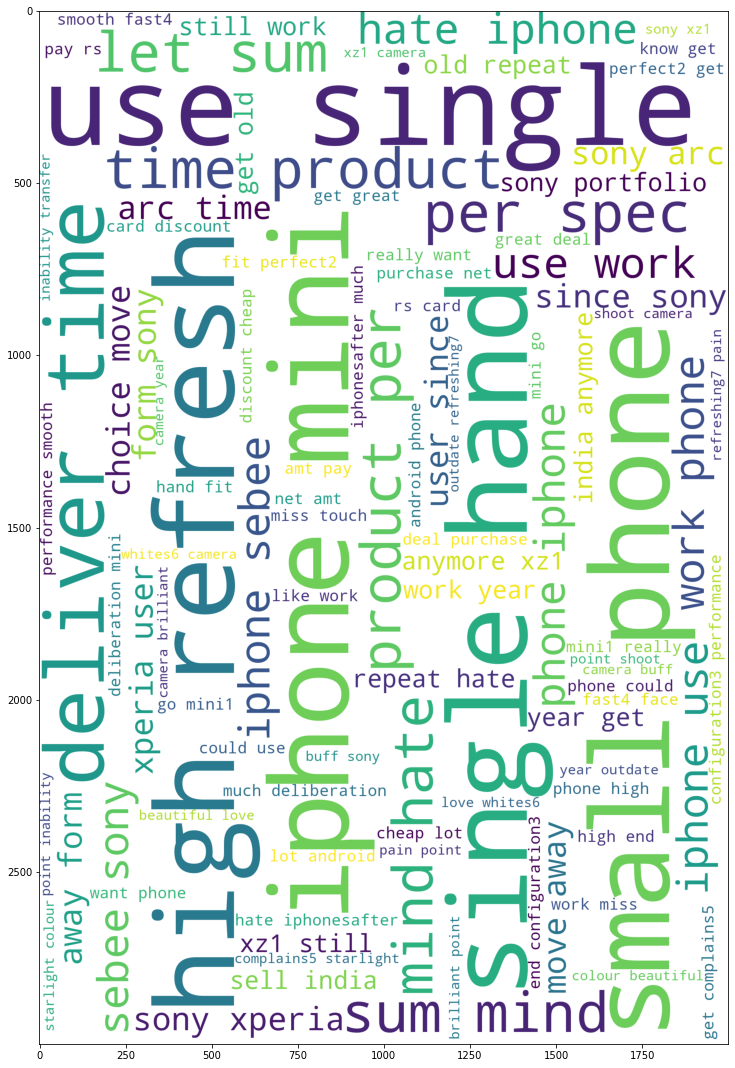

In [72]:
wordcloud = WordCloud(background_color = 'white',stopwords=my_stop_words,height = 3000,width = 2000, max_words=100).generate(cleaned_comment)
plot_cloud(wordcloud)

In [97]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [103]:

def cal_sent_score(text):
  sent_score = 0
  if text:
    sentence = nlp(text)
    for word in sentence:
        sent_score += affinity_scores.get(word.lemma_,0)
  
  return sent_score

In [106]:
df.head()

,stars,comment
0,5.0 out of 5 stars,delivered on time and the product was as per s...
1,5.0 out of 5 stars,delivered on time and the product was as per s...
2,4.0 out of 5 stars,let me sum up my mind here i hate iphones i us...
3,5.0 out of 5 stars,prosform factor is unmatched there is literall...
4,5.0 out of 5 stars,nice and small phone good for showing off


In [107]:
df['sent_score'] = df['comment'].apply(cal_sent_score)
df

,stars,comment,sent_score
0,5.0 out of 5 stars,delivered on time and the product was as per s...,-1
1,5.0 out of 5 stars,delivered on time and the product was as per s...,-1
2,4.0 out of 5 stars,let me sum up my mind here i hate iphones i us...,14
3,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
4,5.0 out of 5 stars,nice and small phone good for showing off,6
...,...,...,...
1195,5.0 out of 5 stars,it’s a powerful and ultra smooth device and no...,9
1196,5.0 out of 5 stars,handy and easy to use with single hand battry ...,4
1197,4.0 out of 5 stars,product is just fantastic but why 4 stars the ...,6
1198,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2


In [109]:
df.sort_values('sent_score',ascending=False).head(20)

,stars,comment,sent_score
278,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
113,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
548,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
104,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
1163,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
206,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
774,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
493,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
675,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28
467,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28


In [110]:
df.sort_values('sent_score').head(20)

,stars,comment,sent_score
300,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
506,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
868,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
110,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
229,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
861,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
850,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
878,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
227,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2
511,5.0 out of 5 stars,anything and everything been a iphone user ear...,-2


In [113]:
df['word_count'] = df['comment'].str.split().apply(len)
df.head()

,stars,comment,sent_score,word_count
0,5.0 out of 5 stars,delivered on time and the product was as per s...,-1,12
1,5.0 out of 5 stars,delivered on time and the product was as per s...,-1,12
2,4.0 out of 5 stars,let me sum up my mind here i hate iphones i us...,14,303
3,5.0 out of 5 stars,prosform factor is unmatched there is literall...,28,262
4,5.0 out of 5 stars,nice and small phone good for showing off,6,8


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


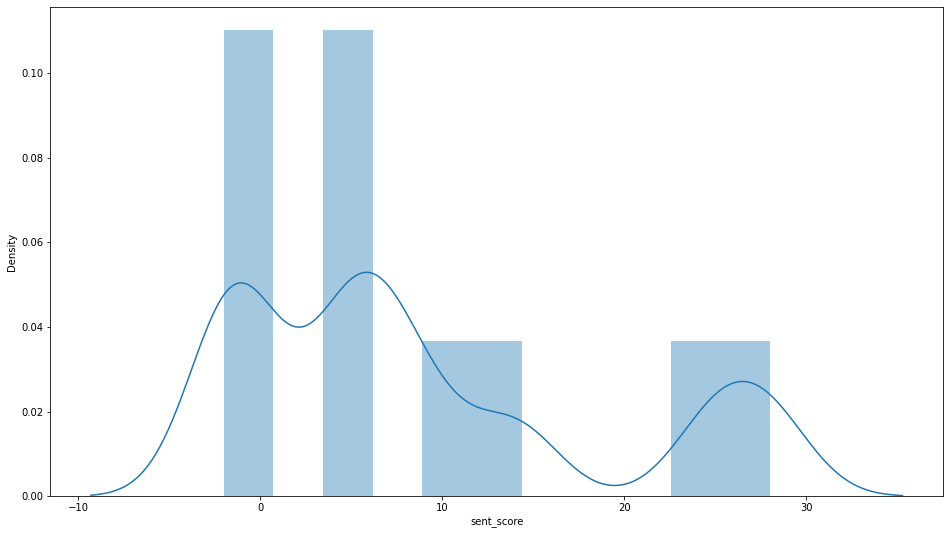

In [119]:
import seaborn as sns
plt.figure(figsize = (16,9))
sns.distplot(df.sent_score)

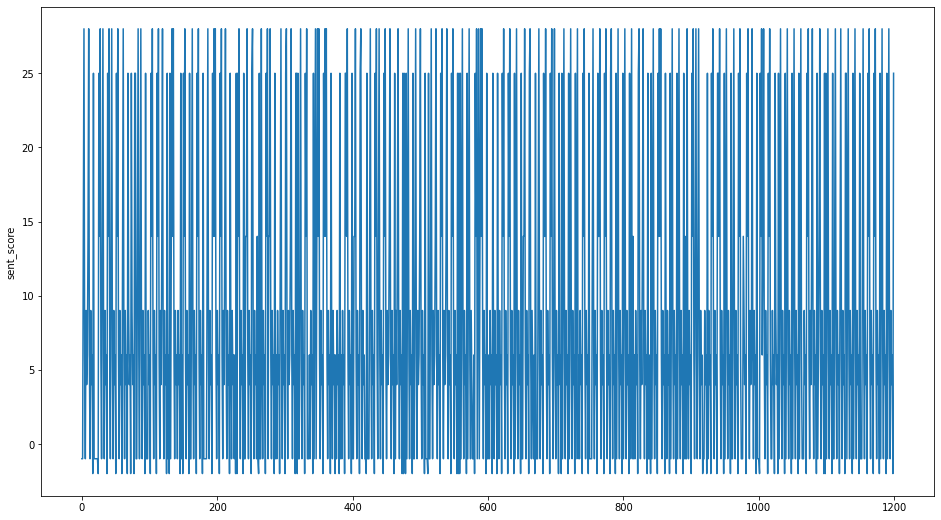

In [118]:
plt.figure(figsize = (16,9))
sns.lineplot(y= df.sent_score,x= range(0,len(df)))

In [120]:
df['sent_score'].describe()

count    1200.000000
mean        8.800000
std        10.032142
min        -2.000000
25%        -1.000000
50%         6.000000
75%        14.000000
max        28.000000
Name: sent_score, dtype: float64

In [ ]:
# the mean score of for comments is quite good as overall mean is in positive side.